# Project 12 - Simulating Randomness

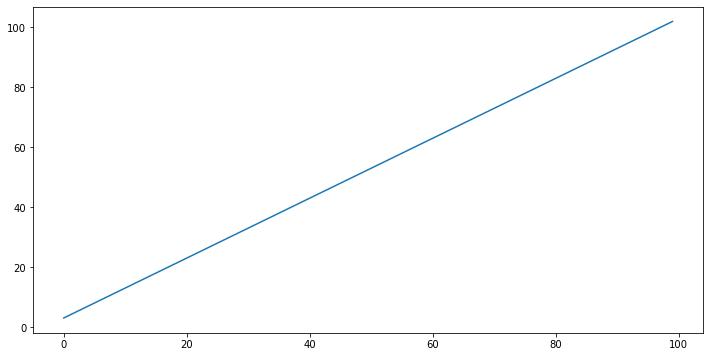

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12,6))
plt.plot(line)
plt.show()
line

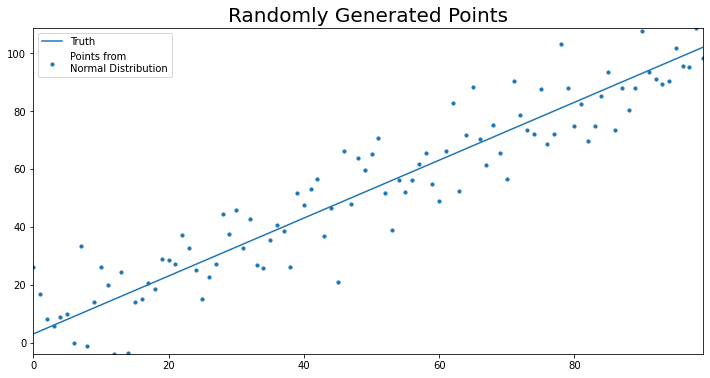

In [2]:
import random

points = []
for point in line:
    points.append(random.normalvariate(point, 10))

figure = plt.figure(figsize = (12, 6))
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.plot(line, label ="Truth")
plt.scatter(np.arange(len(points)), points, s = 10,
           label = "Points from\nNormal Distribution")
plt.title("Randomly Generated Points", fontsize = 20)
plt.legend(loc = "best")
plt.show()

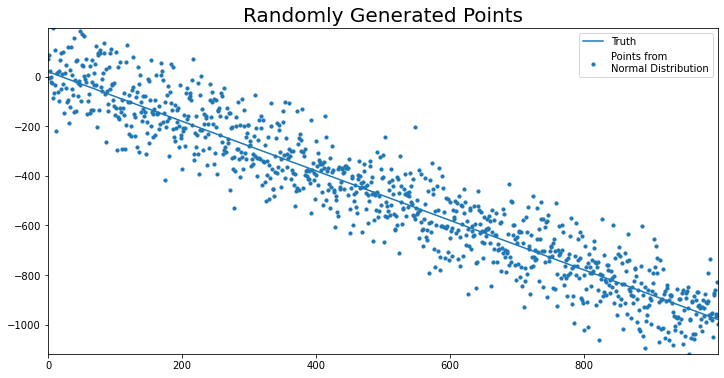

In [3]:
import random

def build_random_data_with_line(y_int, slope, SD = 1, line_length = 100):
    line = np.array([slope * i + y_int for i in range(line_length)])    
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
        
    return line, points

def plot_line(line, points, line_name = "Truth",
              title = "Randomly Generated Points"):

    figure = plt.figure(figsize = (12, 6))
    plt.rcParams["axes.xmargin"] = 0
    plt.rcParams["axes.ymargin"] = 0
    plt.plot(line, label =line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = "Points from\nNormal Distribution")
    plt.title("Randomly Generated Points", fontsize = 20)
    plt.legend(loc = "best")
    plt.show()
    
line, points = build_random_data_with_line(y_int = 20, slope = -1, SD = 100, line_length = 1000)
plot_line(line, points)

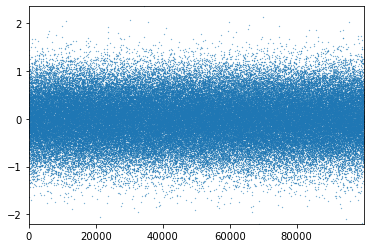

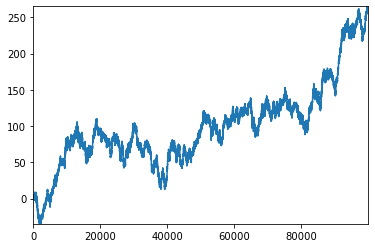

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


mu = 0

# SD = sigma, variance = sigma**2
sigma = .5
random_list = []
observations = 100000
for i in range(100000):
    random_list.append(random.normalvariate(mu, sigma))

plt.plot(random_list, 
         ls = "",
         linewidth = 1, 
         marker = ".", 
         markersize = .5)

plt.show()
plt.close()

simulation = [] 

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i-1] + val)
        
plt.plot(simulation)
plt.show()
plt.close()

In [5]:
def run_monte_carlo(mean, sigma, num_sims, sim_dict, index):
    
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)

In [6]:
mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
index = np.arange(2000)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)
        
monte_carlo_sim_df = (pd.DataFrame(monte_carlo_sim_dict))
        
monte_carlo_sim_df

0         1         2         3         4         5         6     \
0    -0.191766 -1.361442 -0.599385 -0.006894  0.632679 -1.456440  1.215048   
1     1.729122 -1.586380 -0.369631 -0.584147 -0.337350 -0.094493 -0.606690   
2     0.577691  1.141472  1.204295 -0.636967  0.089756  0.284764  0.445551   
3     1.389215 -1.085790 -0.397397  0.226840 -1.011155  0.323728 -1.324218   
4    -1.015991  1.596772  1.297088 -0.640719 -1.325143 -0.812774  1.268294   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.123517 -2.006291  0.121452  0.675099  0.260622 -1.978168 -0.491815   
1996 -1.451331  0.066189 -0.485758 -1.333523 -0.981616  0.573470 -0.884024   
1997 -0.819935  0.147135  0.362069  0.809268  0.855507 -1.277728  0.385317   
1998  1.044601  0.002558 -0.220902  1.527538 -1.476635  1.644071 -0.052374   
1999 -0.233520  0.143231  0.240880  0.055727  1.594319  0.048267 -0.371935   

          7         8         9     ...      1990      1991      1992  \
0     2.436962 -1.641129 -0.593743  ...  1.319655  0.205984  0.722144   
1    -0.026589  2.197448  0.389921  ...  1.015825 -0.343050  1.010483   
2    -0.488885 -0.638189  0.043075  ... -0.004045 -0.167716  0.616811   
3    -0.807863 -3.137213  0.642034  ... -0.838801  1.440467 -0.773460   
4     1.367616  0.159010 -1.340345  ...  0.746724  0.574781 -0.270374   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.518724  2.183697 -0.195609  ...  1.932240 -0.322527  1.421510   
1996  0.381371  0.603646 -2.350814  ...  0.964530  1.590521  1.304323   
1997  2.665143  2.518991  0.332696  ...  1.189467 -0.820453  0.594254   
1998  1.100936  0.289251  0.153889  ... -0.571893 -0.711764  0.711384   
1999  0.710916  0.201650 -1.008356  ...  1.378477 -1.100552  0.535000   

          1993      1994      1995      1996      1997      1998      1999  
0     1.128698  1.000763 -0.180052  0.437405 -2.051978  0.354165  0.629576  
1    -1.163407 -1.743434  0.096807  0.646577  1.332390  1.068449  1.605433  
2    -0.507605  1.472374 -0.283142  0.461354  0.168424  0.578749  0.247410  
3    -0.102433 -0.038992  0.055606  0.520115 -0.432617 -0.345410 -0.162381  
4    -1.634966  1.207192  0.832310 -0.049851  0.841559  0.610093 -1.216755  
...        ...       ...       ...       ...       ...       ...       ...  
1995 -2.034727 -1.140943  1.148554  0.013404  0.807411 -0.108874 -0.984666  
1996 -0.391993 -0.149716 -1.089560 -1.686849 -1.212306 -1.179145  0.033658  
1997 -0.289829 -0.164349  0.231134  1.790019 -2.603181 -0.530556 -0.352524  
1998 -0.183545  1.803434  0.280554 -2.041816  0.123087 -0.561228 -0.846636  
1999  0.002854 -1.527141  0.014413 -0.613886  0.955452 -0.593251  1.264357  

[2000 rows x 2000 columns]

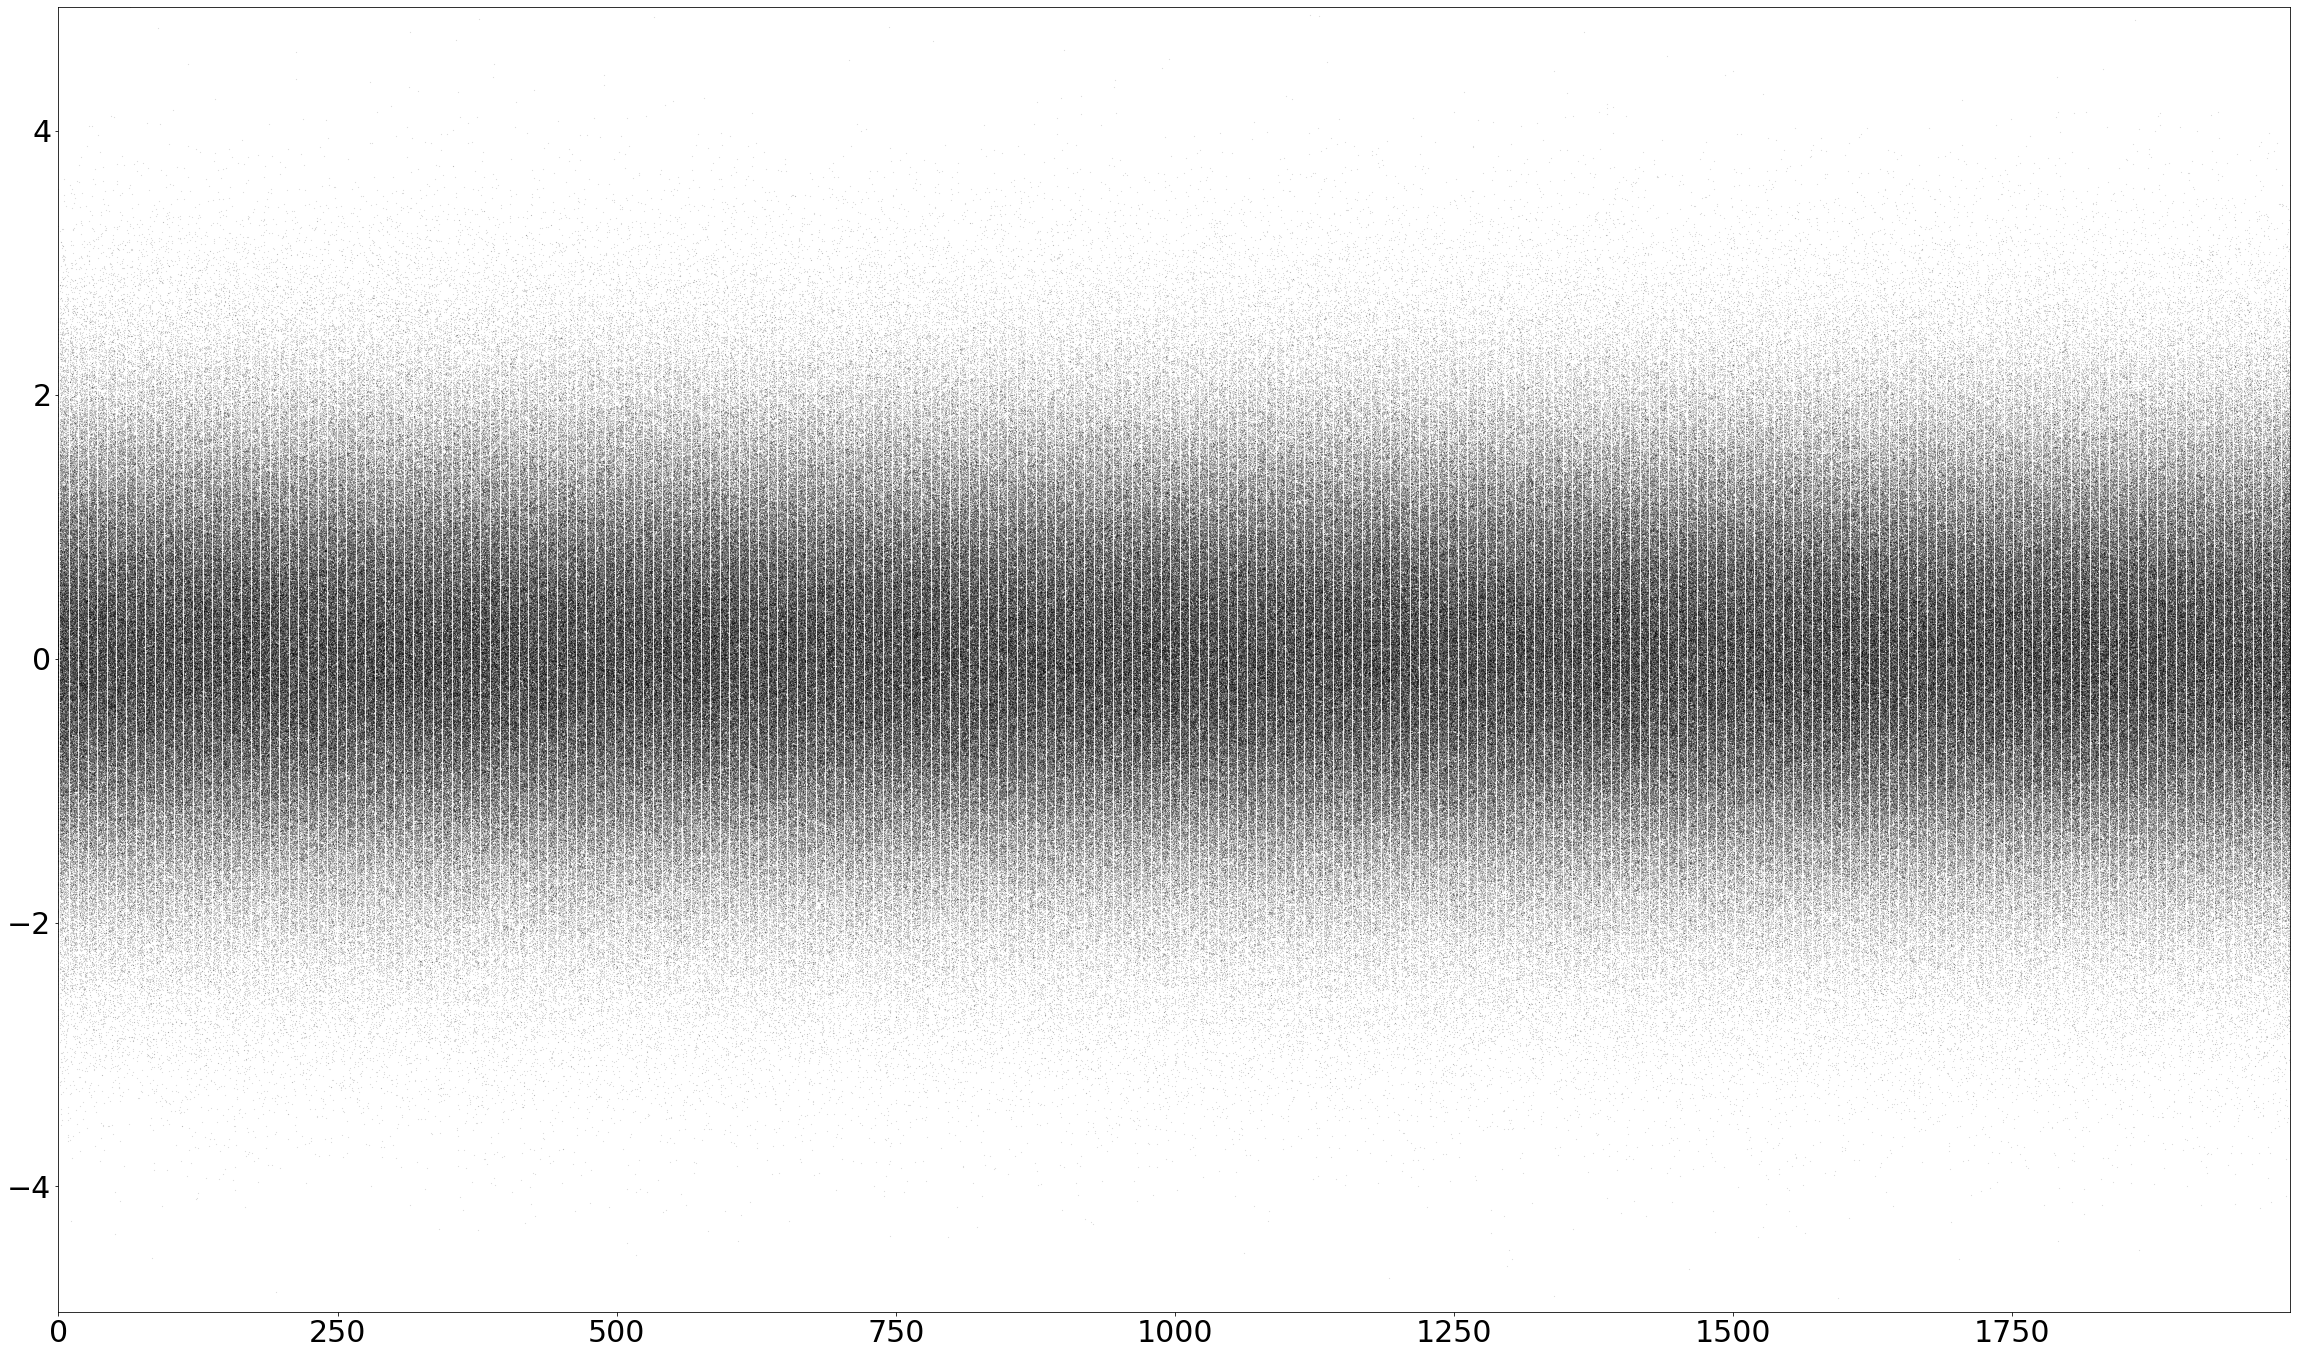

In [7]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, 
                            ls = " ", 
                            marker=".", 
                            markersize = .2, 
                            color ="k", 
                            alpha = .5, 
                            ax = ax)

plt.show()

C:\Users\Owner\AppData\Local\Temp/ipykernel_6216/907618039.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


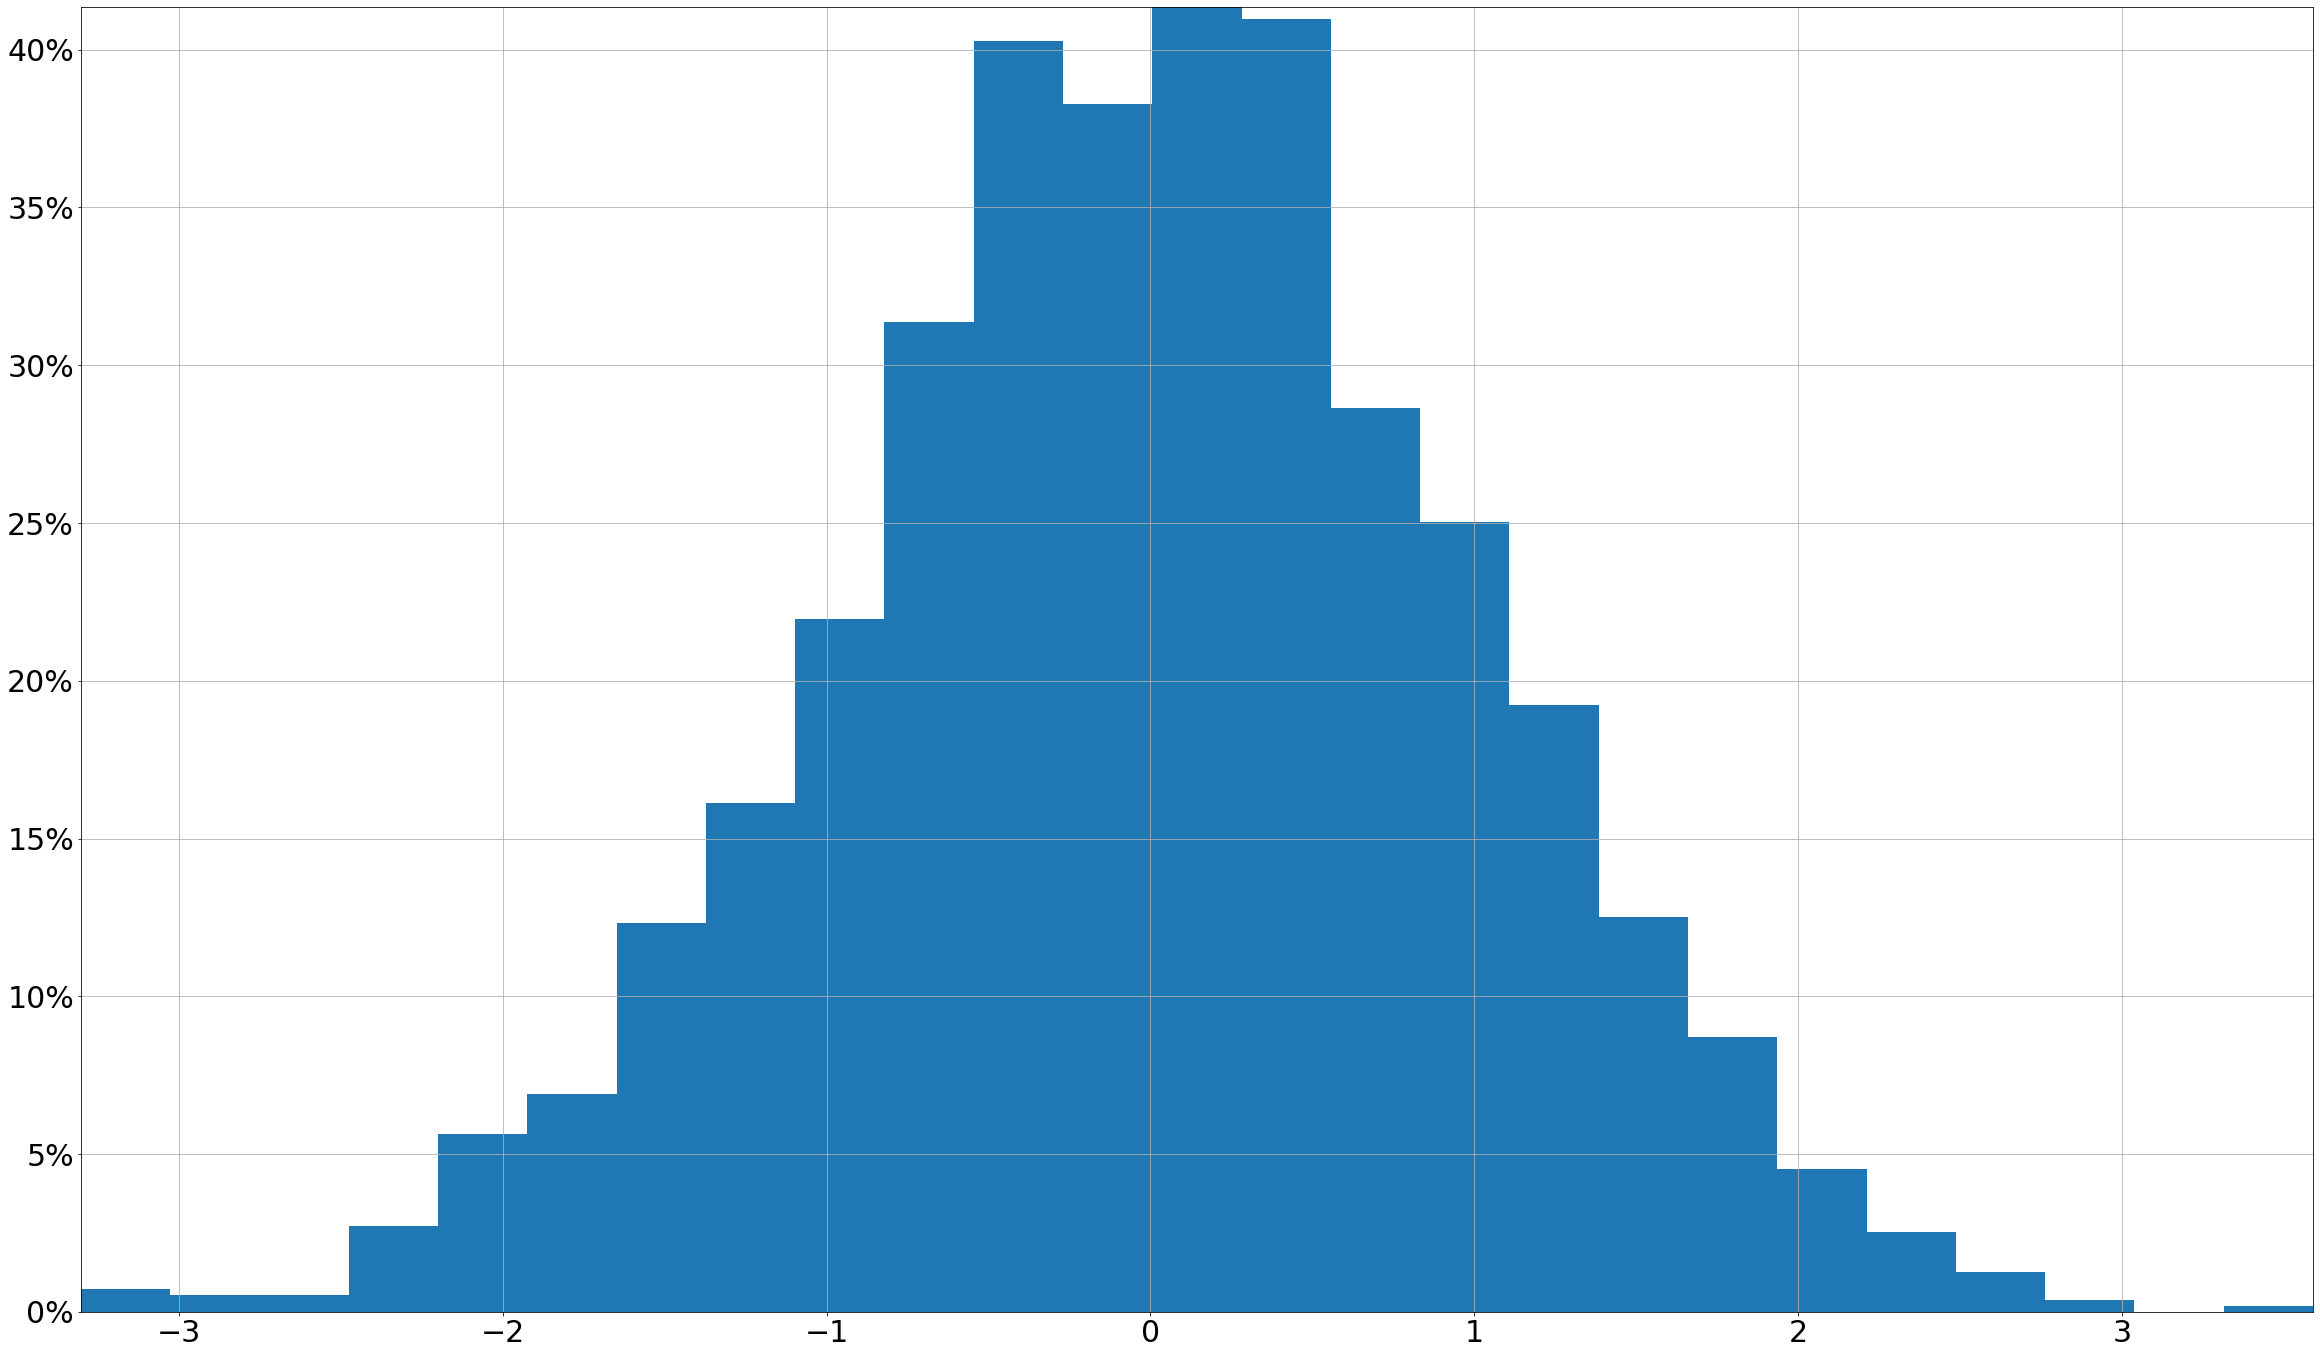

In [8]:
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, 
                                density = True,
                                ax = ax)

# Sets vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])

plt.show()
plt.close()

## Monte Carlo with a Positive Trend

In [9]:
mean = 0.05
sigma = .5
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 2000
index = np.arange(periods)
run_monte_carlo(mean, sigma, num_sims, monte_carlo_sim_dict, index)
pd.DataFrame(monte_carlo_sim_dict)

0         1         2         3         4         5         6     \
0    -0.088082 -0.593074  0.406040  0.847516  0.088754 -0.398068  0.709654   
1     0.015482  0.038607  0.034695  0.167705  0.080532 -0.031807 -0.022836   
2     0.219297 -0.587731  0.658685  0.167443  0.216486 -0.440798 -0.007883   
3    -0.066673  0.027651 -0.762592  0.411097 -0.137158 -1.258482  0.595120   
4     0.175249  0.075777  0.564148  0.902320  0.350806 -0.480460 -0.074228   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -0.788494 -0.317422 -0.096784  0.508130  0.327506 -1.070371 -0.048615   
1996  0.272139  0.013584  0.352937 -0.912197 -0.138119 -0.035525  0.880990   
1997 -0.153726 -0.530219 -0.168154 -0.488844  0.074069  0.145966 -0.729282   
1998 -0.335587  0.655639  0.365497  0.100574 -0.131742 -0.161089  0.364983   
1999 -0.818973  0.169428  0.762060 -0.100006 -0.707303  0.605445  0.623892   

          7         8         9     ...      1990      1991      1992  \
0     0.734417  0.256533  0.765858  ... -0.333192 -0.065233 -0.123894   
1     0.113991  0.060978  0.181349  ...  0.822061  0.473732  0.328968   
2    -0.181820  0.154948  0.071290  ... -0.684625 -0.344624  0.006692   
3    -0.209599  0.994968 -0.702345  ...  0.585708  0.216259 -0.298625   
4     0.877984 -0.428881  0.098048  ... -0.145223  0.184455  0.096219   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.038633  0.788021  0.387951  ... -0.595972 -0.765274  0.516116   
1996  0.091391  0.648903  0.026286  ... -0.355458 -1.395118  0.267148   
1997  0.547198 -0.646308 -0.505512  ...  0.186765  0.578748  0.193440   
1998 -0.310585 -0.363852  0.853376  ...  0.888366  0.614390 -0.665512   
1999 -0.163870 -0.026614  0.177498  ... -0.283423 -0.242265  1.036499   

          1993      1994      1995      1996      1997      1998      1999  
0     0.474322 -0.361840 -0.875505  0.843167  0.248747  0.056999 -0.197106  
1    -0.128071  0.886993 -0.191110 -0.364725  1.376219  0.483288  0.489115  
2     0.264269 -0.509521 -0.497947  0.038861  0.202648  0.582763 -0.705860  
3     0.428803  0.798207  0.314989 -0.331066  0.937680  0.409714  1.064245  
4    -0.047782 -0.266725 -0.586150 -0.564899  0.621950  0.862418  0.256167  
...        ...       ...       ...       ...       ...       ...       ...  
1995 -0.615331  0.831584  0.581238 -0.002013 -0.708104  0.121840  0.009950  
1996 -0.374039  0.233735 -0.357997 -0.632962 -0.067470  0.636054 -0.501481  
1997 -0.972976  0.134338 -0.353992 -0.135963  0.480927  0.167733  0.054167  
1998  0.302186 -0.955175 -0.299647  0.113251  0.841222 -0.310908  0.019117  
1999 -0.696637  0.761990  0.530445  0.006496  0.849275  0.105518 -0.051103  

[2000 rows x 2000 columns]

In [10]:
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df

0          1          2           3          4           5     \
0      -0.088082  -0.593074   0.406040    0.847516   0.088754   -0.398068   
1      -0.072600  -0.554467   0.440734    1.015221   0.169286   -0.429875   
2       0.146697  -1.142198   1.099419    1.182664   0.385772   -0.870673   
3       0.080023  -1.114547   0.336828    1.593761   0.248614   -2.129155   
4       0.255272  -1.038770   0.900976    2.496081   0.599420   -2.609615   
...          ...        ...        ...         ...        ...         ...   
1995  116.382850  85.494463  83.223315  109.025258  86.716199  133.743938   
1996  116.654989  85.508047  83.576252  108.113061  86.578080  133.708413   
1997  116.501263  84.977828  83.408098  107.624217  86.652149  133.854379   
1998  116.165676  85.633467  83.773594  107.724791  86.520407  133.693290   
1999  115.346703  85.802895  84.535654  107.624786  85.813104  134.298735   

            6          7          8          9     ...        1990       1991  \
0       0.709654   0.734417   0.256533   0.765858  ...   -0.333192  -0.065233   
1       0.686818   0.848408   0.317511   0.947207  ...    0.488869   0.408499   
2       0.678935   0.666589   0.472459   1.018498  ...   -0.195756   0.063875   
3       1.274055   0.456989   1.467428   0.316153  ...    0.389952   0.280134   
4       1.199827   1.334974   1.038547   0.414200  ...    0.244729   0.464589   
...          ...        ...        ...        ...  ...         ...        ...   
1995  152.374742  86.618163  78.445621  87.842876  ...  106.006771  74.955666   
1996  153.255732  86.709554  79.094524  87.869162  ...  105.651313  73.560548   
1997  152.526451  87.256752  78.448216  87.363650  ...  105.838078  74.139296   
1998  152.891434  86.946167  78.084364  88.217027  ...  106.726444  74.753686   
1999  153.515325  86.782297  78.057750  88.394525  ...  106.443021  74.511421   

           1992       1993       1994       1995        1996        1997  \
0     -0.123894   0.474322  -0.361840  -0.875505    0.843167    0.248747   
1      0.205074   0.346251   0.525153  -1.066616    0.478441    1.624967   
2      0.211766   0.610520   0.015632  -1.564563    0.517302    1.827614   
3     -0.086859   1.039324   0.813839  -1.249574    0.186236    2.765294   
4      0.009360   0.991542   0.547114  -1.835724   -0.378663    3.387244   
...         ...        ...        ...        ...         ...         ...   
1995  68.654325  73.891676  78.574341  86.660572  108.302662  130.101331   
1996  68.921473  73.517636  78.808076  86.302575  107.669700  130.033861   
1997  69.114913  72.544661  78.942414  85.948583  107.533737  130.514788   
1998  68.449401  72.846846  77.987239  85.648936  107.646988  131.356009   
1999  69.485900  72.150210  78.749229  86.179381  107.653484  132.205284   

            1998       1999  
0       0.056999  -0.197106  
1       0.540288   0.292009  
2       1.123050  -0.413851  
3       1.532765   0.650394  
4       2.395182   0.906561  
...          ...        ...  
1995  101.671085  99.200930  
1996  102.307139  98.699449  
1997  102.474872  98.753615  
1998  102.163965  98.772732  
1999  102.269483  98.721629  

[2000 rows x 2000 columns]

In [11]:
def plot_monte_carlo_sim(sim_data, 
                        title = None,
                        logy = True):
    sim_data["mean"] = sim_data.mean(axis = 1)
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
        legend = False, 
        marker = ".", 
        markersize = .1, 
        color = "k",
        alpha = 0.05, 
        logy = logy, 
        ax = ax)
    sim_data["mean"].plot.line(
        legend = False, 
        color ="C1",
        linewidth = 5,
        logy = logy,
        ax = ax
    )
    
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()

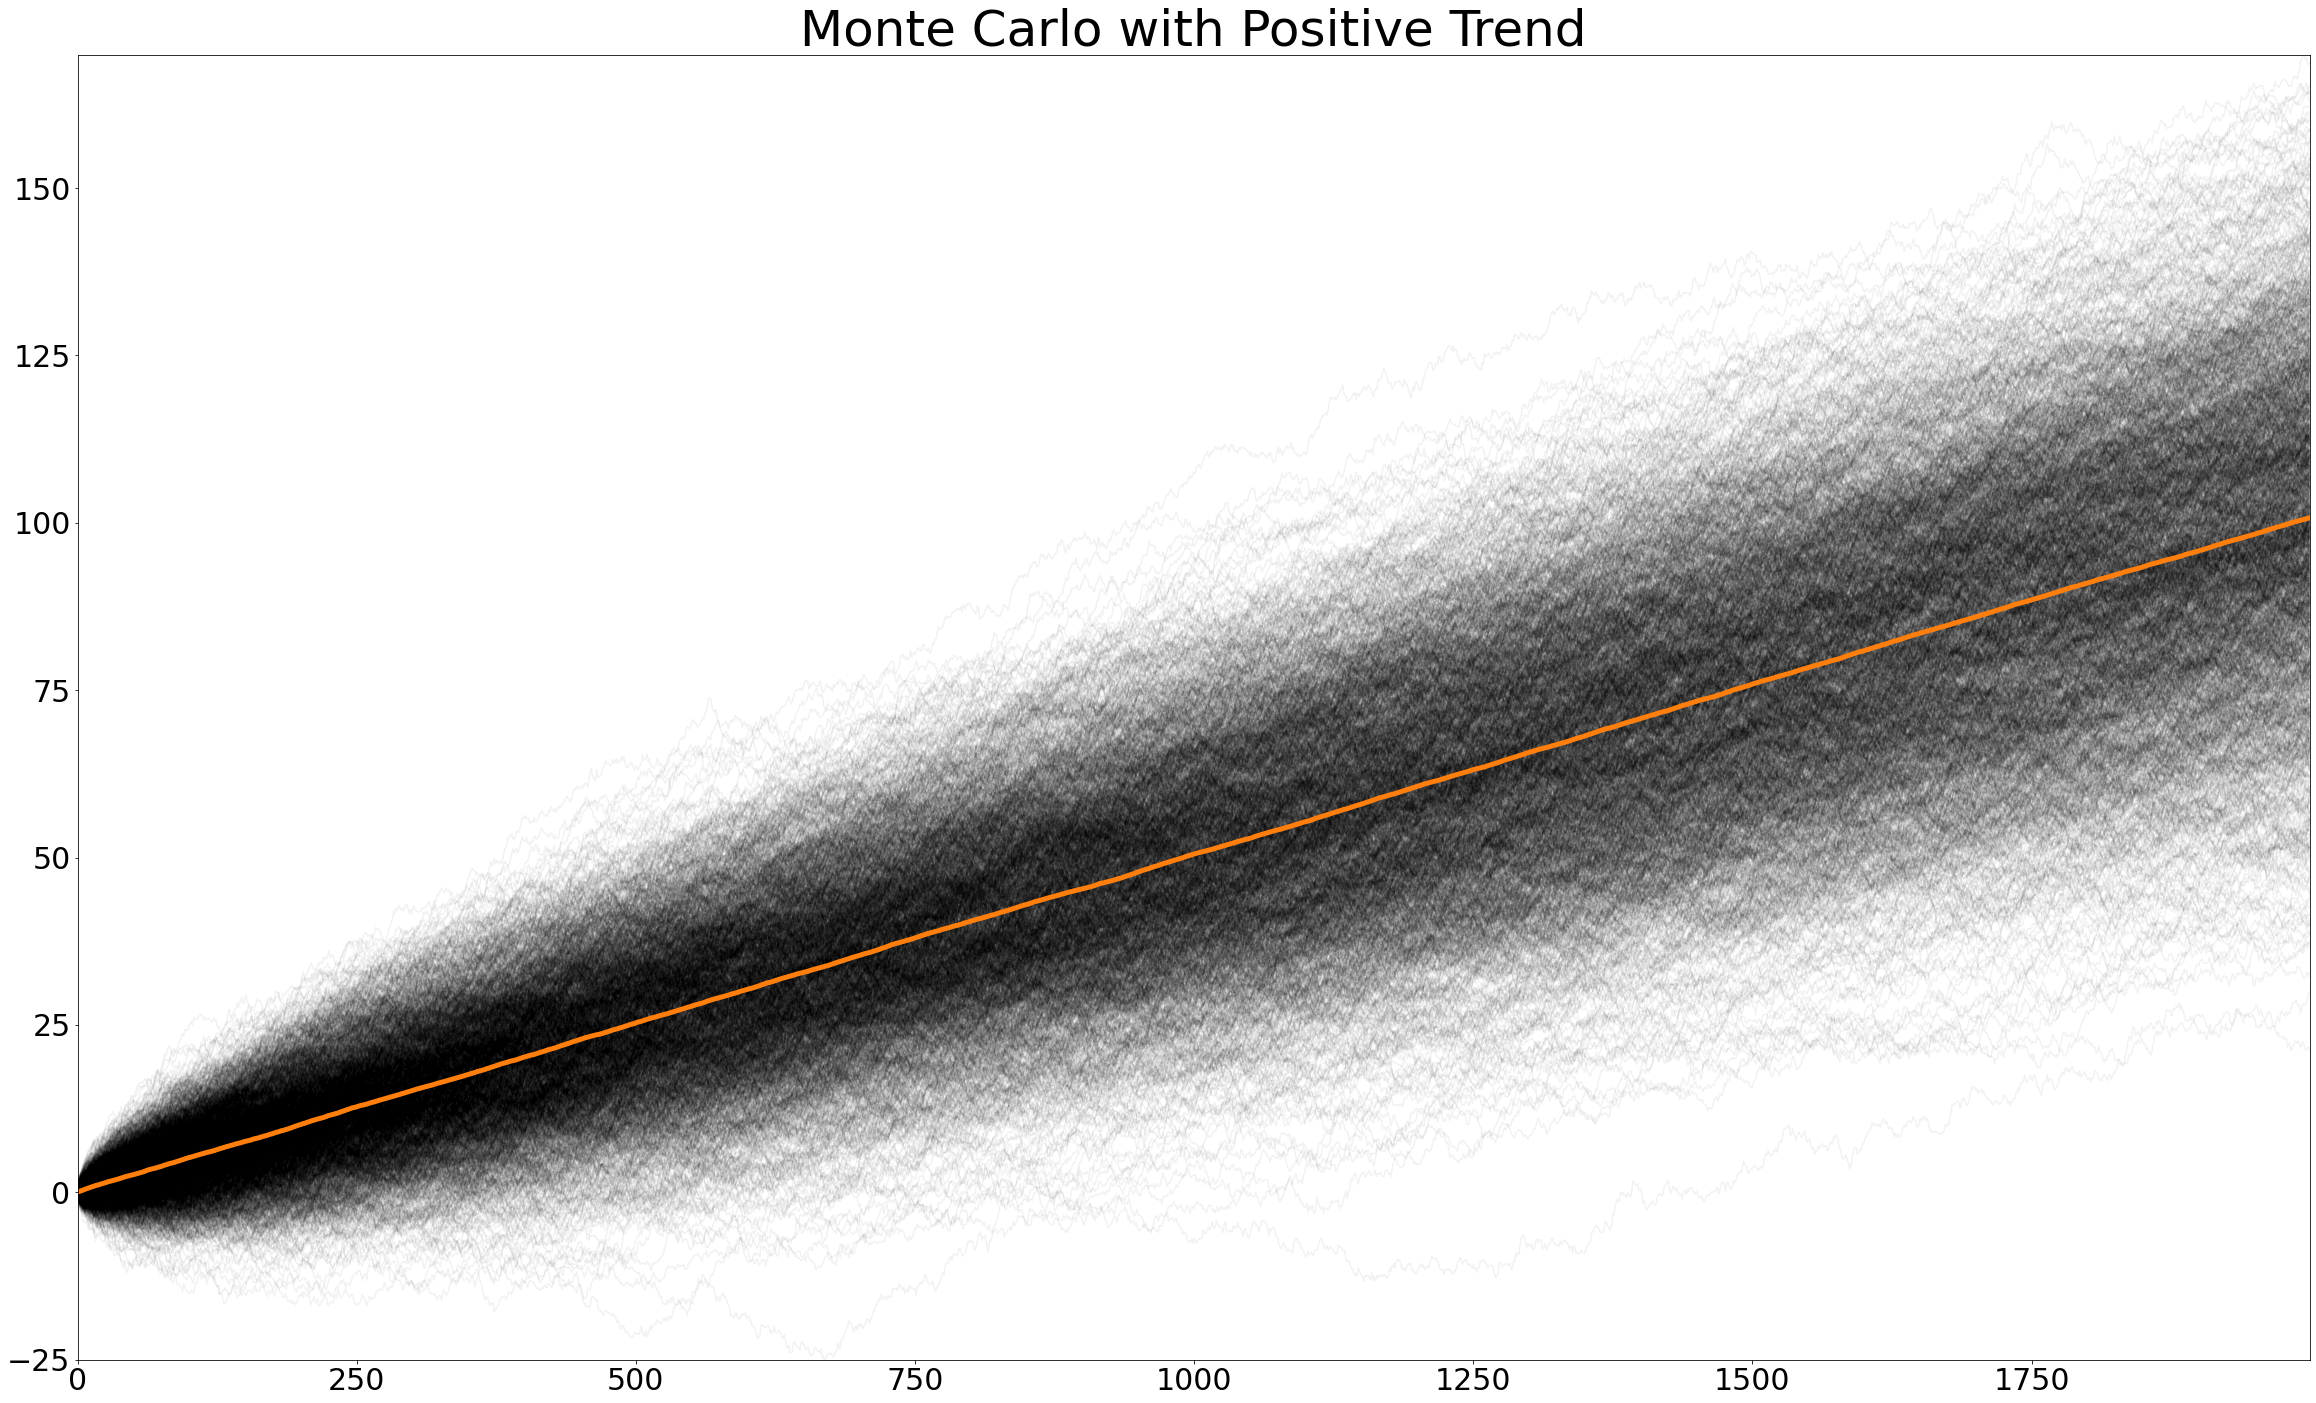

In [12]:
plot_monte_carlo_sim(monte_carlo_sim_df,
                    title = "Monte Carlo with Positive Trend",
                    logy = False)

In [ ]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.today()
data_dict = {}
stocks = "MSFT", "AAPL", "IBM", "GOOG"
for name in stocks:
    data_dict[name] = web.DataReader(name, "yahoo", start, end)
data_dict

In [ ]:
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)
close_data_df

In [ ]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change

In [ ]:
close_data_normalized = close_data_pct_change.add(1).cumprod()
close_data_normalized.fillna(1, inplace = True)
close_data_normalized

In [ ]:
fig, ax = plt.subplots(figsize = (40, 24))
close_data_normalized.plot.line(ax = ax)
plt.show()
plt.close()

## Daily Rate of Return

   $PV = \frac{FV}{(1 + r)^t}$
   
   Overall rate of return: $R=\frac{FV}{PV}$

To find the average rate of return, discount the overall rate of return

   $ r = (R)^{\frac{1}{t}} - 1$
   
   $t$ is measured in trading days

In [ ]:
FV = close_data_normalized.iloc[-1]
PV = close_data_normalized.iloc[0]
R = FV.div(PV)
t = close_data_normalized["MSFT"].count()

In [ ]:
mean_var_df = pd.DataFrame(
    {"mean": R ** (1 / t) - 1,
     "sigma" : close_data_pct_change.std()})
mean_var_df

In [ ]:
num_sims = 500
dates = list(close_data_df.index)
monte_carlo_sim_dict = {}
for stock in stocks:
    monte_carlo_sim_dict[stock] = {}
    mean = mean_var_df["mean"][stock]
    sigma = mean_var_df["sigma"][stock]   
    run_monte_carlo(mean, 
                    sigma, 
                    num_sims, 
                    monte_carlo_sim_dict[stock], 
                    dates)

In [ ]:
monte_carlo_sim_dfs = {stock: pd.DataFrame(monte_carlo_sim_dict[stock]).add(1).cumprod() for stock in stocks}
monte_carlo_sim_dfs

In [ ]:
def plot_monte_carlo_sim(sim_data,
                        observed_data = None,
                        title = None,
                        logy = True):
    sim_data["mean"] = sim_data.mean(axis = 1)    
    index = sim_data.index
    fig, ax = plt.subplots(figsize = (40, 24))
    sim_data.drop(["mean"], inplace = False, axis = 1).plot.line(
            legend = False, 
        marker =".", 
        markersize = .1, 
        color = "k", 
        alpha = .05, 
        logy = logy, 
        ax = ax)
    if observed_data is not None:
        observed_data.plot.line(legend = False, 
                                color = "C0",
                               linewidth = 5,
                               logy = logy,
                               ax = ax)
        # find x coordinate of lowest value observed
        obs_text_x = observed_data[observed_data == observed_data.min()].index
        plt.text(obs_text_x, observed_data.loc[obs_text_x] * .7,
                 "Observed", fontsize = 70, color = "C0")

    sim_data["mean"].plot.line(legend = False, 
                               color = "C1",
                              linewidth = 5, 
                               logy = logy, 
                               ax = ax)
    
    plt.text(index[-400], sim_data["mean"].iloc[-400] * 1.5,
            "Exp\nVal",
            fontsize = 70,
            color = "C1")
    plt.title(title, fontsize = 50)
    plt.show()
    plt.close()

In [ ]:
print(monte_carlo_sim_dfs["GOOG"])

In [ ]:
for stock in stocks:
    plot_monte_carlo_sim(sim_data = monte_carlo_sim_dfs[stock],
                         observed_data = close_data_normalized[stock], 
                         title = stock, 
                         logy = True)

# Calculating Portfolio Return

In [ ]:
portfolio_weights = {stock: 1 / len(stocks) for stock in stocks}
portfolio_weights

In [ ]:
ex_return = pd.DataFrame(close_data_normalized.apply(
    lambda x: x.mul(portfolio_weights[x.name]),
    axis = 0).sum(axis=1),
    columns = ["Portfolio Return"])
ex_return

In [ ]:
close_data_normalized["Portfolio Return"] = ex_return
close_data_normalized

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
close_data_normalized.drop(["Portfolio Return"],  
                           axis = 1).plot.line(linestyle = "--",
                                               alpha = .5,
                                               ax = ax)
close_data_normalized[["Portfolio Return"]].plot.line(linewidth = 5, 
                                                      color = "k",
                                                      ax = ax)
plt.legend()

In [ ]:
ex_return_pct_change = ex_return.pct_change()
ex_return_pct_change.dropna(inplace = True)
ex_return_pct_change

In [ ]:
t =  ex_return["Portfolio Return"].count()
PV = ex_return.iloc[0]
FV = ex_return.iloc[-1]
mean_var_df = pd.DataFrame({"mean": (
    FV / PV) ** (1 / t) - 1,
                           "sigma": ex_return_pct_change.std()})
mean_var_df

In [ ]:
num_sims = 1000
dates = ex_return.index
monte_carlo_sim_dict = {}
mean = mean_var_df["mean"]["Portfolio Return"]
sigma = mean_var_df["sigma"]["Portfolio Return"]
run_monte_carlo(mean, 
                sigma, 
                num_sims,
               monte_carlo_sim_dict,
               dates)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).add(1).cumprod()
monte_carlo_sim_df

In [ ]:
plot_monte_carlo_sim(sim_data = monte_carlo_sim_df, 
                     observed_data = ex_return["Portfolio Return"],
                     title = "Portfolio Return",
                     logy = True
                    )